# Estimating $\pi$ with a Montecarlo algorithm

This is the "hello world" exercise for Montecarlo Algorithms: estimating the value of $\pi$ using brute-force statistics.

The idea is the following: if you inscribe a circle of radius $r$ in a square of side $2r$, the ratio between the two areas is:

\begin{equation}
\frac{\pi r^2}{4 r^2} = \frac{\pi}{4}
\end{equation} 


Now throw samples inside the square with uniform probability.
The probability that your random point falls inside the circle is exactly the ratio between the two areas $p = \pi/4$ . 

You can estimate the probability $p$ by counting the number of succesful events (points inside the circle) divided by the total number of events. Therefore:

\begin{equation}
\pi = 4 p = 4 \lim_{N \rightarrow \infty} \frac{\text{# samples inside the circle}}{N}
\end{equation} 

Increasing the number of samples, the estimate of $\pi$ increases in accuracy.

<img src="https://drive.google.com/uc?id=1QB-kA_lsImeA6itMzQ7cZPw0bBXBbLO3" alt="Drawing"/>


## 1 - Estimate $\pi$ given $N$ samples

Generate `n_samples` random points inside a square. The two coordinates can be obtained separately by using `np.random.rand()`. Count how many times the samples fall inside the inscribed circle, and derive the estimate of $\pi$ using the formula above.

**Hint**: follow the pseudocode.
> - Init the counter of points inside the circle to zero $N_{in}=0$.
> - Iterate over $i = 1, \ldots, N_{samples}$:
>> - Generate the $X$ coordinate as a unif rand sample.
>> - Generate the $Y$ coordinate as a unif rand sample.
>> - If the point is inside the circle increase the counter.
> - Print the $\pi$ estimate using the derived formula.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random 

counter = 0
n = 10000000
for i in range(n):
    rand_x= random.uniform(-1, 1)
    rand_y= random.uniform(-1, 1)
    origin_dist = rand_x**2 + rand_y**2

    if origin_dist <= 1:
        counter += 1
        
    pi = 4* counter/ n
    
print(pi)

3.142058


## 1b, Extra - Solve the previous point without using python loops (if you did not before)

Use boolean arrays to count the succesful events of the point in the circle. 

In this way the performance increases drastically. You can easily generate $10^8$ samples in few seconds.

In [2]:
N = 100000000
new_array = np.random.rand(N,2)*2 -1
true = new_array[:,0]**2 + new_array[:,1]**2 < 1
bool_array = np.sum(true)
pi = 4*bool_array/N
print(pi)

3.14146148


## 2 - Study the statistics of the process as the number of samples increases

This part of the exercise is similar to the last exercise of the tutorial.
Here you have to generate a trajectory of the estimate of $\pi$ as the number of samples increases.
Then, for an ensemble of these trajectories you can compute the average and the standard deviation.

Suggested code:
- initialize the empty list of averages and standard deviations $\vec{\langle \pi \rangle} = []$, $\vec{\sigma_\pi} = []$.
- iterate over the number of samples $N = N_{min}, \ldots, N_{max}$:
> - Initializate an empty list $\vec{\pi} = []$
> - iterate over the realizations $r = 1, \ldots, R$:
>> - generate a $N$ random points 
>> - compute $\pi$ given the number of points inside the circle
>> - add $\pi$ to $\vec{\pi}$.
> - compute the average $\langle \pi \rangle$ and standard deviations $\sigma_\pi$ of the list $\vec{\pi}$, and add them to the lists $\vec{\langle \pi \rangle}$, $\vec{\sigma_\pi}$.


In [3]:
def generate_pi(n):
    new_array = np.random.rand(n,2)*2 -1
    true = new_array[:,0]**2 + new_array[:,1]**2 < 1
    bool_array = np.sum(true)
    return 4*bool_array/n

In [5]:
ave_list = []
stddev_list = []
n_samples = np.logspace(1, 4, 4, dtype=int)
for N in n_samples:
    pi_list = []
    for j in range(2):
        pi = generate_pi(N)
        pi_list.append(pi)
    ave_pi = np.mean(pi_list)
    stddev_pi = np.std(pi_list)
    
    ave_list.append(ave_pi)
    stddev_list.append(stddev_pi)

10
2.8
2.4
2.5999999999999996
[2.5999999999999996]
100
3.52
3.12
3.3200000000000003
[2.5999999999999996, 3.3200000000000003]
1000
3.18
3.128
3.154
[2.5999999999999996, 3.3200000000000003, 3.154]
10000
3.1492
3.146
3.1475999999999997
[2.5999999999999996, 3.3200000000000003, 3.154, 3.1475999999999997]


Verify that the standard deviation decreases as $N^{-1/2}$.

Plot the std using a double logarithmic scale. With this transformation, $y' = log(y)$, $x'=log(x)$, a power law becomes a line with slope equal to the power:

\begin{equation}
y = x^\alpha \;\;\; \rightarrow \;\;\; log(y) = log(x^\alpha) \;\;\; \rightarrow \;\;\; y' = \alpha x'
\end{equation}

Therefore, a function $N^{-1/2}$ should be a line parallel to your standard deviation function.



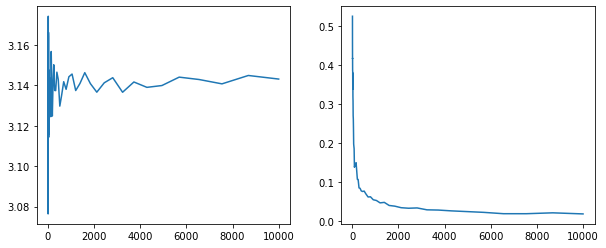

In [26]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(n_samples, ave_list)
ax[1].plot(n_samples, stddev_list)
plt.show()

## 3 - Extra: compute the volume of a $d$-dimensional sphere using Montecarlo 

https://en.wikipedia.org/wiki/N-sphere#Volume_and_surface_area

In [1]:
from scipy.special import gamma

def sphere_volume(d, radius):
  """This methods compute the volume of a d-sphere of given radius"""  
  return radius**d * np.pi**(d/2) / gamma(d/2 + 1)

What happens at the ratio between the d-sphere volume and the d-cube volume in which the sphere is inscribed as the dimension increases?